In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt


In [6]:
# load the dataset
df = pd.read_csv('Data.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [7]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
df.shape



(2861, 11)

In [9]:
df.describe()


,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
std,6.084226,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000


In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [11]:
df.isnull().sum

<bound method DataFrame.sum of          id   date    NH4   BSK5  Suspended     O2    NO3    NO2    SO4  \
0     False  False  False  False      False  False  False  False  False   
1     False  False  False  False      False  False  False  False  False   
2     False  False  False  False      False  False  False  False  False   
3     False  False  False  False      False  False  False  False  False   
4     False  False  False  False      False  False  False  False  False   
...     ...    ...    ...    ...        ...    ...    ...    ...    ...   
2856  False  False  False  False      False  False  False  False  False   
2857  False  False  False  False      False  False  False  False  False   
2858  False  False  False  False      False  False  False  False  False   
2859  False  False  False  False      False  False  False  False  False   
2860  False  False  False  False      False  False  False  False  False   

        PO4     CL  
0     False  False  
1     False  False  
2    

In [12]:
df['Date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [13]:
df=df.sort_values(by=['id','date'])
df.head()



,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,Date
43,1,01.12.2010,0.291,3.27,16.7,12.30,59.20,0.090,278.4,0.370,1375.46,2010-12-01
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.00,2001-03-02
41,1,02.06.2010,0.290,3.52,37.2,7.16,57.87,0.210,268.8,0.240,1120.20,2010-06-02
22,1,02.09.2005,0.000,3.68,28.5,14.20,15.51,0.033,422.4,0.900,2063.80,2005-09-02
62,1,02.09.2015,0.035,6.28,104.8,7.80,4.68,0.076,694.4,0.530,5615.28,2015-09-02


In [14]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [15]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,Date,year,month
43,1,01.12.2010,0.291,3.27,16.7,12.30,59.20,0.090,278.4,0.370,1375.46,2010-12-01,2010,12
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.00,2001-03-02,2001,3
41,1,02.06.2010,0.290,3.52,37.2,7.16,57.87,0.210,268.8,0.240,1120.20,2010-06-02,2010,6
22,1,02.09.2005,0.000,3.68,28.5,14.20,15.51,0.033,422.4,0.900,2063.80,2005-09-02,2005,9
62,1,02.09.2015,0.035,6.28,104.8,7.80,4.68,0.076,694.4,0.530,5615.28,2015-09-02,2015,9


In [16]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'Date', 'year', 'month'],
      dtype='object')

In [17]:
pollutants=['NH4','BSK5','Suspended','O2','NO3','NO2','SO4','PO4','CL']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2861 entries, 43 to 2818
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   object        
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
 11  Date       2861 non-null   datetime64[ns]
 12  year       2861 non-null   int32         
 13  month      2861 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1), object(1)
memory usage: 312.9+ KB


In [19]:
display(df)

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,Date,year,month
43,1,01.12.2010,0.291,3.27,16.7,12.30,59.20,0.090,278.40,0.370,1375.46,2010-12-01,2010,12
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00,2001-03-02,2001,3
41,1,02.06.2010,0.290,3.52,37.2,7.16,57.87,0.210,268.80,0.240,1120.20,2010-06-02,2010,6
22,1,02.09.2005,0.000,3.68,28.5,14.20,15.51,0.033,422.40,0.900,2063.80,2005-09-02,2005,9
62,1,02.09.2015,0.035,6.28,104.8,7.80,4.68,0.076,694.40,0.530,5615.28,2015-09-02,2015,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95,2020-10-27,2020,10
2835,22,28.01.2019,0.044,0.94,1.6,12.85,7.28,0.032,103.04,0.448,60.33,2019-01-28,2019,1
2684,22,28.08.2006,0.037,1.55,22.3,8.12,2.04,0.029,109.20,0.500,54.04,2006-08-28,2006,8
2685,22,28.09.2006,0.061,1.26,1.6,6.75,3.65,0.025,69.60,0.480,41.10,2006-09-28,2006,9


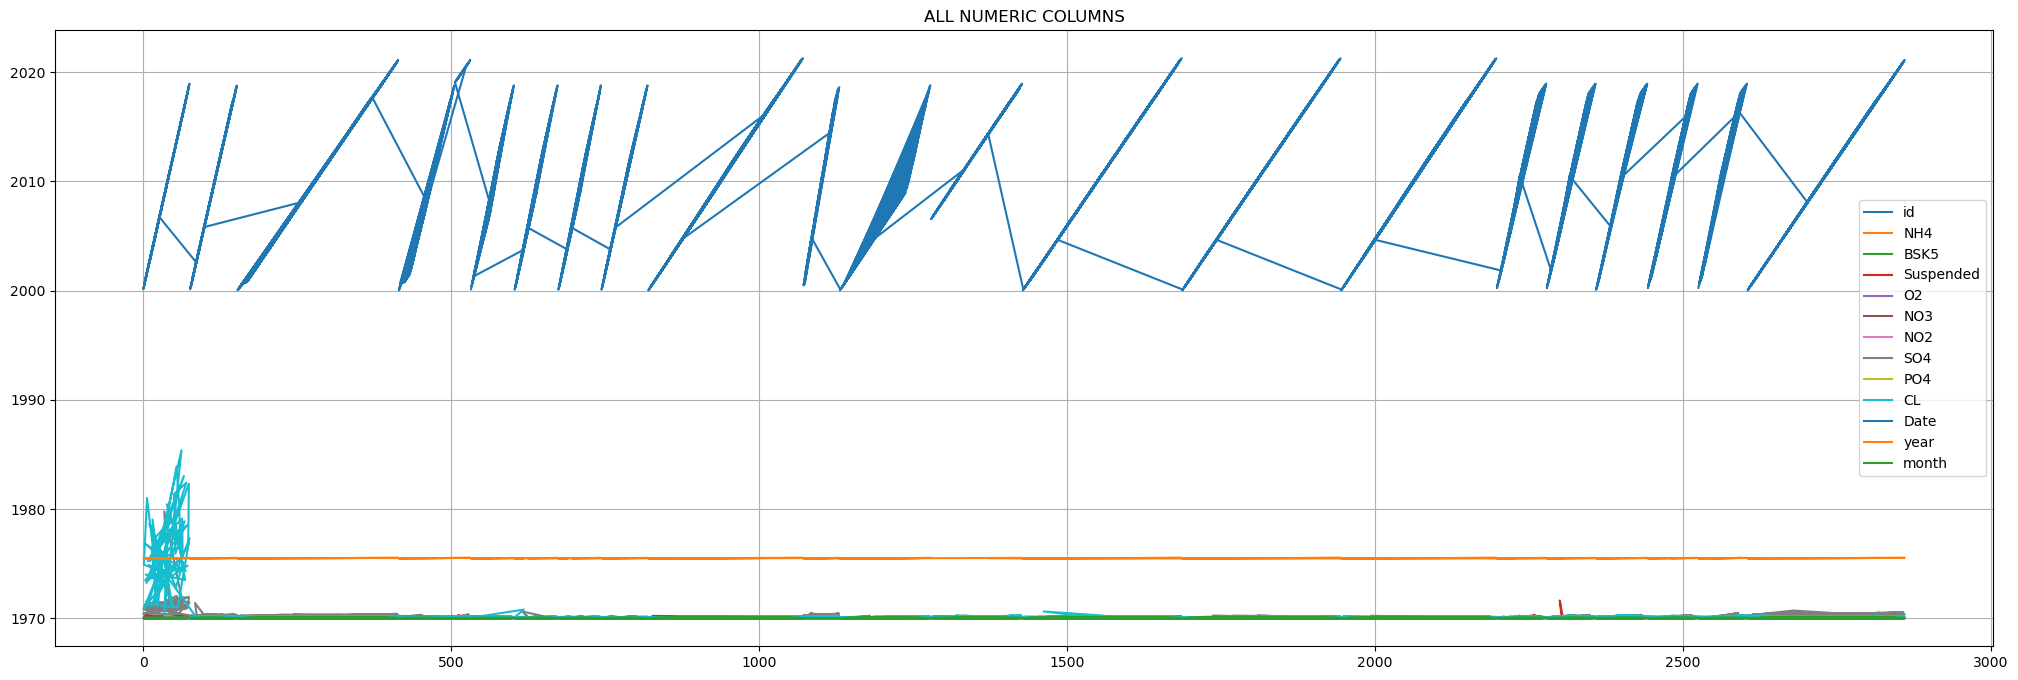

In [20]:
df.plot(figsize=(25,8),title="ALL NUMERIC COLUMNS")
plt.grid(True)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2861 entries, 43 to 2818
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   object        
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
 11  Date       2861 non-null   datetime64[ns]
 12  year       2861 non-null   int32         
 13  month      2861 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1), object(1)
memory usage: 312.9+ KB


In [22]:
df = df.dropna(subset=pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,Date,year,month
43,1,01.12.2010,0.291,3.27,16.7,12.30,59.20,0.090,278.4,0.370,1375.46,2010-12-01,2010,12
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.00,2001-03-02,2001,3
41,1,02.06.2010,0.290,3.52,37.2,7.16,57.87,0.210,268.8,0.240,1120.20,2010-06-02,2010,6
22,1,02.09.2005,0.000,3.68,28.5,14.20,15.51,0.033,422.4,0.900,2063.80,2005-09-02,2005,9
62,1,02.09.2015,0.035,6.28,104.8,7.80,4.68,0.076,694.4,0.530,5615.28,2015-09-02,2015,9


In [23]:
df.isnull().sum()

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
Date         0
year         0
month        0
dtype: int64

In [24]:
X = df[['id', 'year']]
y = df[pollutants]

In [25]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [27]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [28]:
y_pred = model.predict(X_test)

In [29]:
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
NH4:
   MSE: 1.3389030226302183
   R2: 0.5075698298153315

BSK5:
   MSE: 5.4966842778181455
   R2: 0.2536805521908698

Suspended:
   MSE: 177.64684047501495
   R2: -0.3898093078569824

O2:
   MSE: 23.804974219550807
   R2: -0.024655347555051943

NO3:
   MSE: 14.190326747205722
   R2: 0.46420823872601225

NO2:
   MSE: 0.9021202011124738
   R2: -2.306102849515763

SO4:
   MSE: 799.3361629017251
   R2: 0.7636185777198815

PO4:
   MSE: 0.23319148787932148
   R2: 0.14388427070369814

CL:
   MSE: 31223.168320328627
   R2: 0.6324865646628188



In [31]:
station_id = '22'
year_input = 2025

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2025:
  NH4: 0.00
  BSK5: 2.05
  Suspended: 0.86
  O2: 14.04
  NO3: 5.79
  NO2: 0.04
  SO4: 132.33
  PO4: 0.52
  CL: 65.75


In [32]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!
